In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### Changing directories in order to access datasets and files stored in specific locations

In [ ]:
import os

# changing directory to 'Project_01'
os.chdir("/content/drive/MyDrive/Data_Mining_24/Project_01")

# **First Part: ✨Data exploration**✨
## First, after importing all the necessary libraries for our project, we perform a few checks to determine which data should be included in our training files

In [ ]:
import pandas as pd
import numpy as np
import string
import sys
import re

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# creating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# creating maps
import folium

# for the second part of the assignment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
#from unidecode import unidecode

# defining lists for each year, each month and CSV file name
year_list = ["2019", "2023"]
months_list_2019 = ["febrouary", "march", "april"]
months_list_2023 = [ "march" , "june", "september" ]
csvfiles_names_list = ["calendar", "listings", "listings0", "neighbourhoods", "reviews", "reviews0"]

# creating an empty dictionary to store dataframes
df_dictionary = {}

for year in year_list:
  if year == "2019":
    for month in months_list_2019:
      for name in csvfiles_names_list:
        csv_path = f"data/{year}/{month}/{name}.csv"
        # reading data and creating a dataframe
        df = pd.read_csv(csv_path)
        # adding a new column 'month' to each DataFrame
        df['month'] = month
        # assigning dataframe a key in the dictionary
        df_dictionary[f"df_{year}_{month}_{name}"] = df
  elif year == "2023":
    for month in months_list_2023:
      for name in csvfiles_names_list:
        csv_path = f"data/{year}/{month}/{name}.csv"
        # reading data and creating a dataframe
        df = pd.read_csv(csv_path)
        # adding a new column 'month' to each DataFrame
        df['month'] = month
        # assigning dataframe a key in the dictionary
        df_dictionary[f"df_{year}_{month}_{name}"] = df

<ipython-input-245-77eb7563826e>:42: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
<ipython-input-245-77eb7563826e>:42: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
<ipython-input-245-77eb7563826e>:42: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


There is no need to worry about the above warnings as we will not be using those columns.

## Next, we're going to see if the CSV files from different months have the same columns.



In [ ]:
for year in year_list:
  for name in csvfiles_names_list:
    if year == "2019":
      if df_dictionary[f"df_2019_{months_list_2019[0]}_{name}"].columns.tolist() == df_dictionary[f"df_2019_{months_list_2019[1]}_{name}"].columns.tolist() == \
      df_dictionary[f"df_2019_{months_list_2019[2]}_{name}"].columns.tolist():
        print(f"All columns of {name} in 2019 folder in every month folder are the same.\n")
    if year == "2023":
      if df_dictionary[f"df_2023_{months_list_2023[0]}_{name}"].columns.tolist() == df_dictionary[f"df_2023_{months_list_2023[1]}_{name}"].columns.tolist() == \
      df_dictionary[f"df_2023_{months_list_2023[2]}_{name}"].columns.tolist():
        print(f"All columns of {name} in 2023 folder in every month folder are the same.\n")


All columns of calendar in 2019 folder in every month folder are the same.

All columns of listings in 2019 folder in every month folder are the same.

All columns of listings0 in 2019 folder in every month folder are the same.

All columns of neighbourhoods in 2019 folder in every month folder are the same.

All columns of reviews in 2019 folder in every month folder are the same.

All columns of reviews0 in 2019 folder in every month folder are the same.

All columns of calendar in 2023 folder in every month folder are the same.

All columns of listings in 2023 folder in every month folder are the same.

All columns of listings0 in 2023 folder in every month folder are the same.

All columns of neighbourhoods in 2023 folder in every month folder are the same.

All columns of reviews in 2023 folder in every month folder are the same.

All columns of reviews0 in 2023 folder in every month folder are the same.



## All twelve files (for both years) contain the same columns. We are now ready to proceed.

In [ ]:
# creating a list by selecting specific columns from the listing files
requested_columns_names = [
    "id", "zipcode", "transit", "bedrooms", "beds", "review_scores_rating", "number_of_reviews", "neighbourhood", "name", "latitude", "longitude",
    "last_review", "instant_bookable", "host_since", "host_response_rate", "host_identity_verified", "host_has_profile_pic", "First_review",
    "Description", "City", "Cancellation_policy", "bed_type", "bathrooms", "accommodates", "amenities", "room_type", "property_type", "price",
    "availability_365", "minimum_nights", "host_id", "month"
]

# changing all column names to lowercase
lowercase_requested_columns_names = [element.lower() for element in requested_columns_names]

# checking which dataframe objects have the requested columns and which are they
# creating an empty dictionary to store dataframes with matching columns
dfs_matching_columns = {}
for year in year_list:
  #all of csv files in each month folder are checked to have the same columns so by checking all csv files of one month is like we have checked them all
  for name in csvfiles_names_list:
    requested_df = df_dictionary[f"df_{year}_april_{name}"] if year == "2019" else df_dictionary[f"df_{year}_june_{name}"]
    # finding matching columns between the dataframe and the lowercase requested columns list
    matching_columns = [col_name for col_name in lowercase_requested_columns_names if col_name in requested_df.columns]
    # storing only the matching columns in the dictionary
    dfs_matching_columns[f"df_{year}_april_{name}" if year == "2019" else f"df_{year}_june_{name}"] = matching_columns

# printing the number of matching elements and the columns for each DataFrame
for df_name, columns in dfs_matching_columns.items():
  print(f"number of matching elements in {df_name} is = {len(columns)}")
  print(f"{df_name} has columns: {columns} \n")


number of matching elements in df_2019_april_calendar is = 3
df_2019_april_calendar has columns: ['price', 'minimum_nights', 'month'] 

number of matching elements in df_2019_april_listings is = 32
df_2019_april_listings has columns: ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights', 'host_id', 'month'] 

number of matching elements in df_2019_april_listings0 is = 13
df_2019_april_listings0 has columns: ['id', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'room_type', 'price', 'availability_365', 'minimum_nights', 'host_id', 'month'] 

number of m

## Now that we've checked everything, we're ready to create the train_2019.csv and train_2023.csv files.

- We only utilize the listings CSV files found within each monthly folder, assuming utilization of all columns.

- We also remove certain columns and make adjustments to some values in our dataframe in order to achieve the best possible results.

In [ ]:
# creating empty lists to store dataframes for the years 2019 and 2023
df_2019_concat_list = []
df_2023_concat_list = []

for key in df_dictionary.keys():
  if '2019' in key:
    # choosing the "listings" files only
    if 'listings' in key and not key.endswith('0'):
      # adding the dataframe associated with this key to our 2019 list
      df_2019_concat_list.append(df_dictionary[key])
  elif '2023' in key:
    if 'listings' in key and not key.endswith('0'):
      df_2023_concat_list.append(df_dictionary[key])

# the listings CSV file in the 2023 folder doesn't have all the columns in requested_columns_names we're creating a new list to address this issue
# replacing the "neighbourhood" column in our list of requested columns with "neighbourhood_cleansed" to achieve better results
requested_columns_names_2023 = [
    "id", "bedrooms", "beds", "review_scores_rating", "number_of_reviews", "neighbourhood_cleansed", "name", "latitude", "longitude", "last_review", "instant_bookable",
    "host_since", "host_response_rate", "host_identity_verified", "host_has_profile_pic", "first_review", "description", "bathrooms", "accommodates", "amenities",
    "room_type", "property_type", "price", "availability_365", "minimum_nights", "host_id", "month"
]

# concatenating dataframes from 2019 and selecting only the requested columns, then saving it to a CSV file.
df_train_2019 = pd.concat([df[lowercase_requested_columns_names] for df in df_2019_concat_list], axis=0, ignore_index=True)
# turning the number of bathrooms into a round number (cleaning numbers like 6.5 etc)
df_train_2019['bathrooms'] = df_train_2019['bathrooms'].round()
df_train_2019.to_csv("train_2019.csv")

# doing the same for 2023
df_train_2023 = pd.concat([df[requested_columns_names_2023] for df in df_2023_concat_list], axis=0, ignore_index=True)
# deleting "bathrooms" column since it doesn't have any values
df_train_2023.drop("bathrooms", axis = 1, inplace=True)
# turning the "beds" values from float to int, for following questions
df_train_2023['beds'] = df_train_2023['beds'].fillna(0)
df_train_2023['beds'] = df_train_2023['beds'].astype(int)
df_train_2023.to_csv("train_2023.csv")

# **Question 1:** Which is the most common room type for your data?

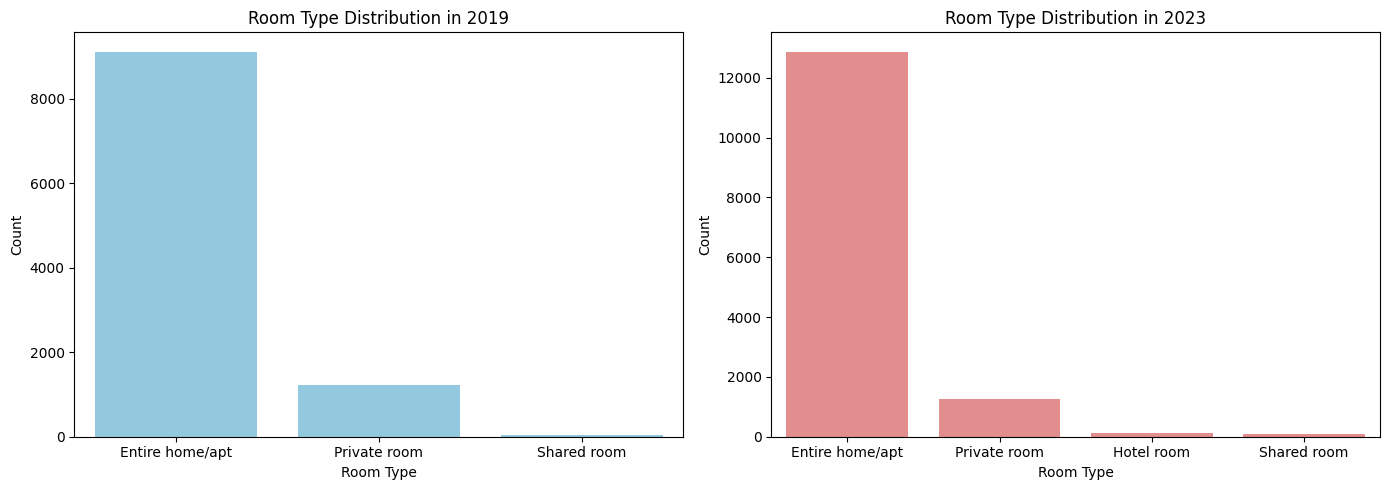

In [ ]:
# creating new dataframe for 2019, selecting only the needed columns and dropping any duplicates
unique_rooms_2019 = df_train_2019[['id', 'room_type']].drop_duplicates(subset=['id'])

# counting how many times each room type appears in 2019 and sorting by count
room_counts_2019 = unique_rooms_2019['room_type'].value_counts().reset_index()
room_counts_2019.columns = ['room_type', 'count']
room_counts_2019 = room_counts_2019.sort_values(by='count', ascending=False)

# doing the exact same for 2023
unique_rooms_2023 = df_train_2023[['id', 'room_type']].drop_duplicates(subset=['id'])

room_counts_2023 = unique_rooms_2023['room_type'].value_counts().reset_index()
room_counts_2023.columns = ['room_type', 'count']
room_counts_2023 = room_counts_2023.sort_values(by='count', ascending=False)

# plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plotting the data for 2019 using Seaborn
sns.barplot(y='count', x='room_type', data=room_counts_2019, color='skyblue', ax=axes[0])
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Room Type')
axes[0].set_title('Room Type Distribution in 2019')

# plotting the data for 2023 using Seaborn
sns.barplot(y='count', x='room_type', data=room_counts_2023, color='lightcoral', ax=axes[1])
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Room Type')
axes[1].set_title('Room Type Distribution in 2023')

# displaying both charts
plt.tight_layout()
plt.show()

# **Question 2:** Make graphs that illustrate the price trends over the period of the three months for both 2019 and 2023.

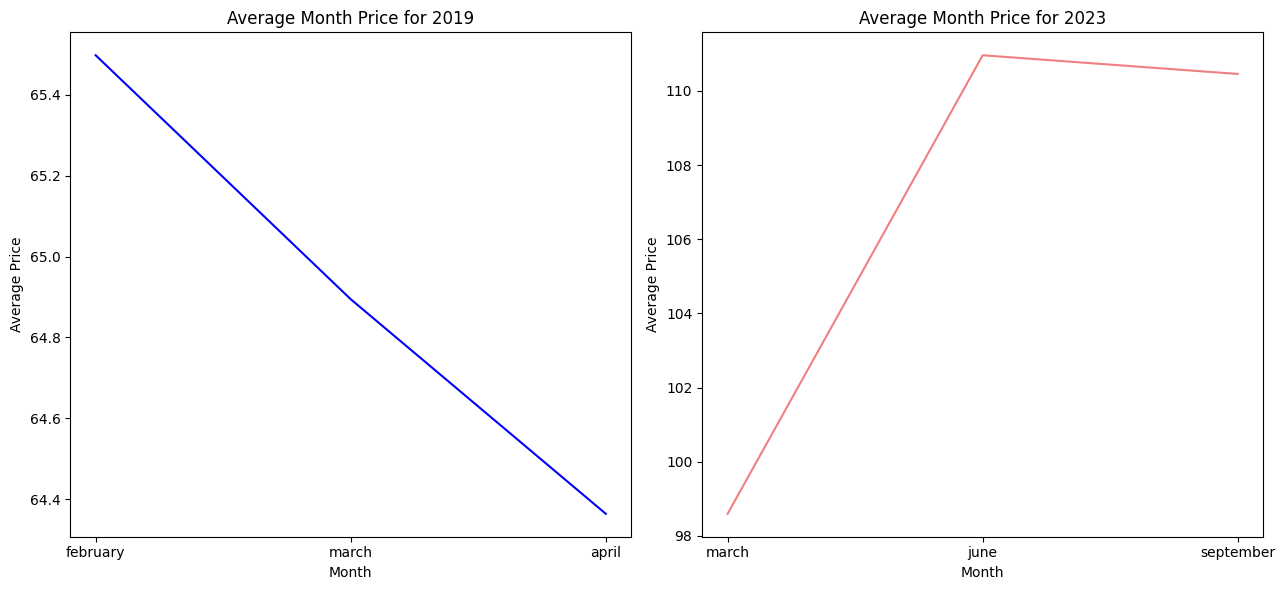

In [ ]:
# copying dataframes to avoid modifying original data
df_2019 = df_train_2019.copy()
df_2023 = df_train_2023.copy()

# removing dollar signs from the 'price' column and convert it to numeric
df_2019['price'] = df_2019['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_2023['price'] = df_2023['price'].str.replace('$', '').str.replace(',', '').astype(float)

# for 2019, calculating mean prices for all three months
# taking only prices from February and calculating the mean price
febrouary_mean_2019 = df_2019[df_2019['month'] == 'febrouary']['price'].mean()

# taking only prices from March and calculating the mean price
march_mean_2019 = df_2019[df_2019['month'] == 'march']['price'].mean()

# taking only prices from April and calculating the mean price
april_mean_2019 = df_2019[df_2019['month'] == 'april']['price'].mean()

# creating a dataFrame with months and their average prices
avg_pr_2019 = pd.DataFrame({'month': ['february', 'march', 'april'],
                            'price': [febrouary_mean_2019, march_mean_2019, april_mean_2019]})

# doing the exact same for 2023
march_mean_2023 = df_2023[df_2023['month'] == 'march']['price'].mean()
june_mean_2023 = df_2023[df_2023['month'] == 'june']['price'].mean()
september_mean_2023 = df_2023[df_2023['month'] == 'september']['price'].mean()

# creating a DataFrame with months and their average prices for 2023
avg_pr_2023 = pd.DataFrame({'month': ['march', 'june', 'september'],
                            'price': [march_mean_2023, june_mean_2023, september_mean_2023]})

# plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# plotting the data for 2019 using Seaborn
sns.lineplot(data=avg_pr_2019, x='month', y='price', color="blue", ax=axes[0])
axes[0].set_title('Average Month Price for 2019')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Price')

# plotting the data for 2023 using Seaborn
sns.lineplot(data=avg_pr_2023, x='month', y='price', color="lightcoral", ax=axes[1])
axes[1].set_title('Average Month Price for 2023')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Price')

# displaying both charts
plt.tight_layout()
plt.show()

# **Question 3:** Which are the top 5 neighborhoods with the most reviews?

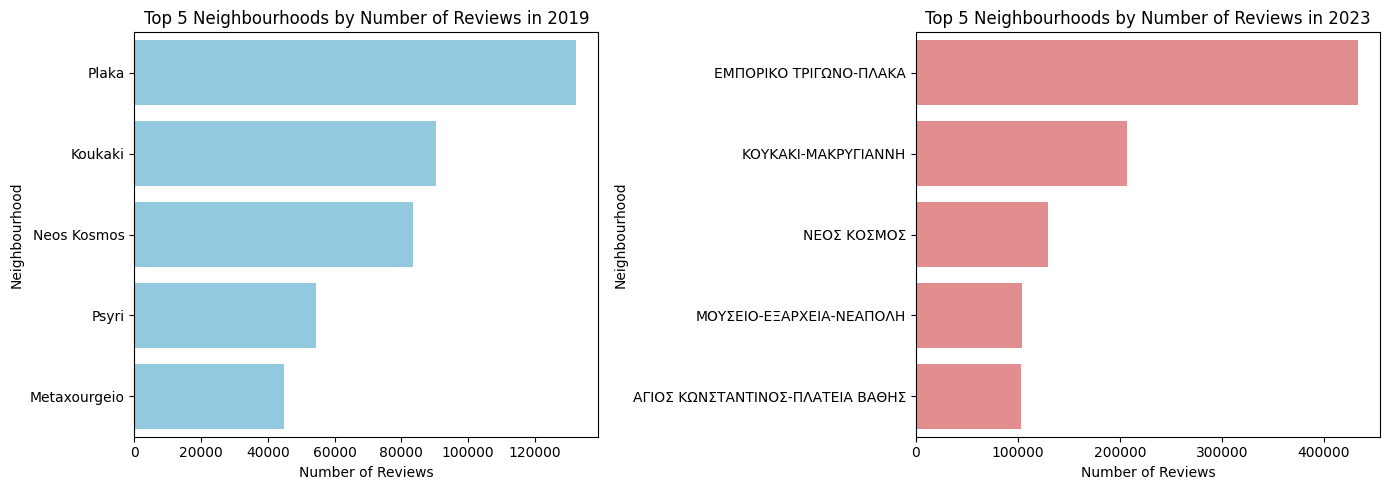

In [ ]:
# creating new dataframe for 2019, selecting only the needed columns
neighbourhood_revs_2019 = df_train_2019[['neighbourhood', 'number_of_reviews']].astype({'number_of_reviews': int})

# group by neighbourhood and sum the reviews
neighborhood_reviews_sum_2019 = neighbourhood_revs_2019.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# keeping only the top 5 neighbourhoods with the most reviews and sorting in descending order
top_neighbourhoods_2019 = neighborhood_reviews_sum_2019.nlargest(5, 'number_of_reviews').sort_values(by='number_of_reviews', ascending=False)

# doing the exact same for 2023
neighbourhood_revs_2023 = df_train_2023[['neighbourhood_cleansed', 'number_of_reviews']].astype({'number_of_reviews': int})
neighborhood_reviews_sum_2023 = neighbourhood_revs_2023.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().reset_index()
top_neighbourhoods_2023 = neighborhood_reviews_sum_2023.nlargest(5, 'number_of_reviews').sort_values(by='number_of_reviews', ascending=False)

# plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plotting the data for 2019 using Seaborn
sns.barplot(data=top_neighbourhoods_2019, x='number_of_reviews', y='neighbourhood', color='skyblue', ax=axes[0])
axes[0].set_title('Top 5 Neighbourhoods by Number of Reviews in 2019')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Neighbourhood')

# plotting the data for 2023 using Seaborn
sns.barplot(data=top_neighbourhoods_2023, x='number_of_reviews', y='neighbourhood_cleansed', color='lightcoral', ax=axes[1])
axes[1].set_title('Top 5 Neighbourhoods by Number of Reviews in 2023')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Neighbourhood')

# displaying both charts
plt.tight_layout()
plt.show()

# **Question 4:** Which is the neighborhood with the most real estate listings?

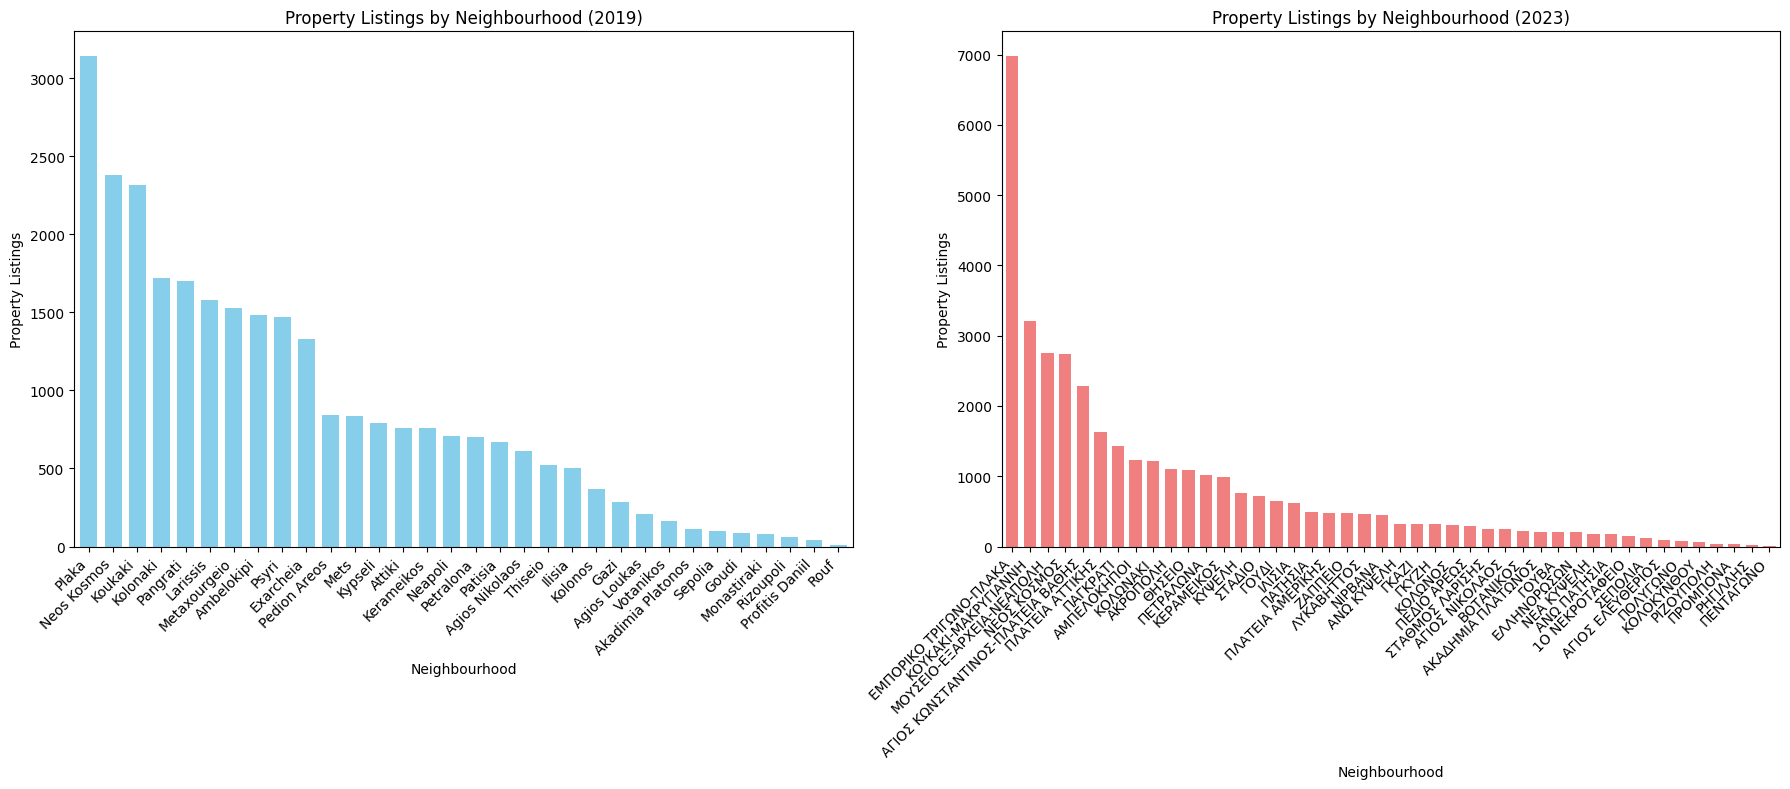

In [ ]:
# creating new copies of the dataframes
df_train_2019_cleanclean = df_train_2019.copy()
df_train_2023_cleanclean = df_train_2023.copy()

# resetting index for proper alignment
df_train_2019_cleanclean.reset_index(drop=True, inplace=True)
df_train_2023_cleanclean.reset_index(drop=True, inplace=True)

# calculating the count of listings per neighborhood
neighborhood_counts_19 = df_train_2019_cleanclean['neighbourhood'].value_counts()
neighborhood_counts_23 = df_train_2023_cleanclean['neighbourhood_cleansed'].value_counts()

# finding the neighborhood with most listings
most_listings_neighborhood_19 = neighborhood_counts_19.idxmax()
most_listings_neighborhood_23 = neighborhood_counts_23.idxmax()

# plotting the data
plt.figure(figsize=(18, 8))

# first subplot: 2019
plt.subplot(1, 2, 1)
neighborhood_counts_19.plot(kind='bar', color='skyblue', width=0.7)
plt.title('Property Listings by Neighbourhood (2019)')
plt.xlabel('Neighbourhood')
plt.ylabel('Property Listings')
# rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# preventing overlap
plt.tight_layout()

# second subplot: 2023
plt.subplot(1, 2, 2)
neighborhood_counts_23.plot(kind='bar', color='lightcoral', width=0.7)
plt.title('Property Listings by Neighbourhood (2023)')
plt.xlabel('Neighbourhood')
plt.ylabel('Property Listings')
# rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# preventing overlap
plt.tight_layout()

# displaying both charts
plt.show()

# **Questions 5 & 6:** How many listings are there per neighborhood and per month? Create one histogram for 2019 and one for 2023.

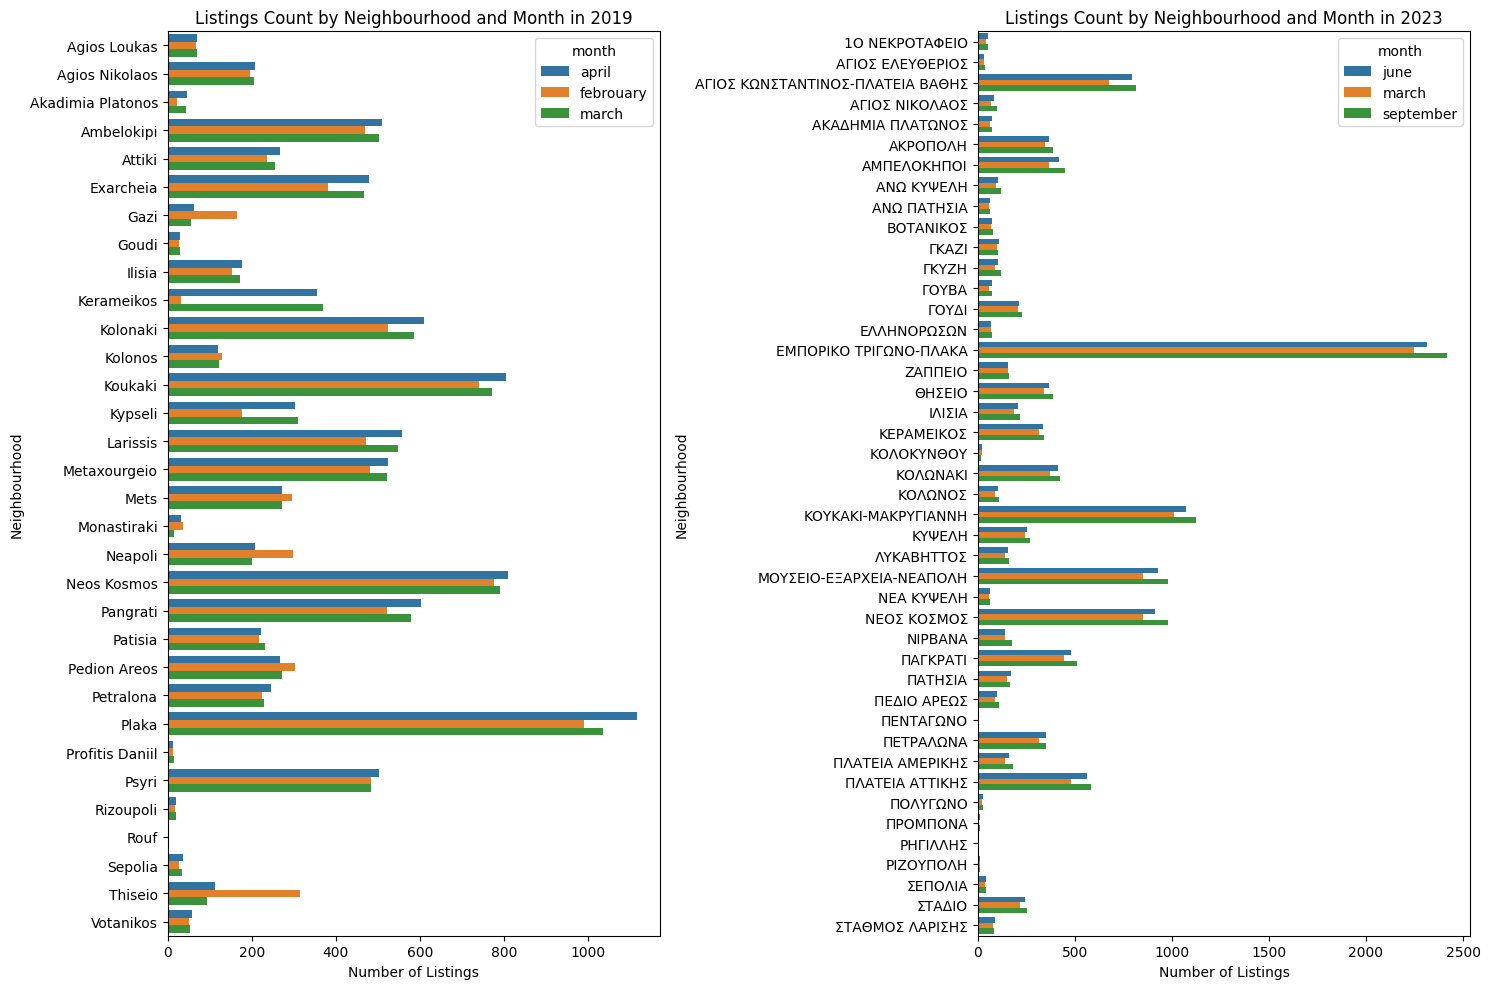

In [ ]:
# creating new dataframe for 2019, selecting only the needed columns
hood_ids_month_2019 = df_train_2019[['id', 'neighbourhood', 'month']].copy()

# dropping any duplicates
hood_ids_month_2019 = hood_ids_month_2019.drop_duplicates(subset=['id', 'month'])

# grouping by neighborhood and month, then counting the listings
neighborhood_month_counts_2019 = df_train_2019.groupby(['neighbourhood', 'month']).size().reset_index(name='count')

# doing the exact same for 2023
hood_ids_month_2023 = df_train_2023[['id', 'neighbourhood_cleansed', 'month']].copy()
hood_ids_month_2023 = hood_ids_month_2023.drop_duplicates(subset=['id', 'month'])
neighborhood_month_counts_2023 = df_train_2023.groupby(['neighbourhood_cleansed', 'month']).size().reset_index(name='count')

# plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# plotting the data for 2019 using Seaborn
sns.barplot(data=neighborhood_month_counts_2019, x='count', y='neighbourhood', hue='month', ax=axes[0])
axes[0].set_xlabel('Number of Listings')
axes[0].set_ylabel('Neighbourhood')
axes[0].set_title('Listings Count by Neighbourhood and Month in 2019')

# plotting the data for 2023 using Seaborn
sns.barplot(data=neighborhood_month_counts_2023, x='count', y='neighbourhood_cleansed', hue='month', ax=axes[1])
axes[1].set_xlabel('Number of Listings')
axes[1].set_ylabel('Neighbourhood')
axes[1].set_title('Listings Count by Neighbourhood and Month in 2023')

# displaying both charts
plt.tight_layout()
plt.show()

# **Question 7:** Which is the most common room type in each neighborhood?

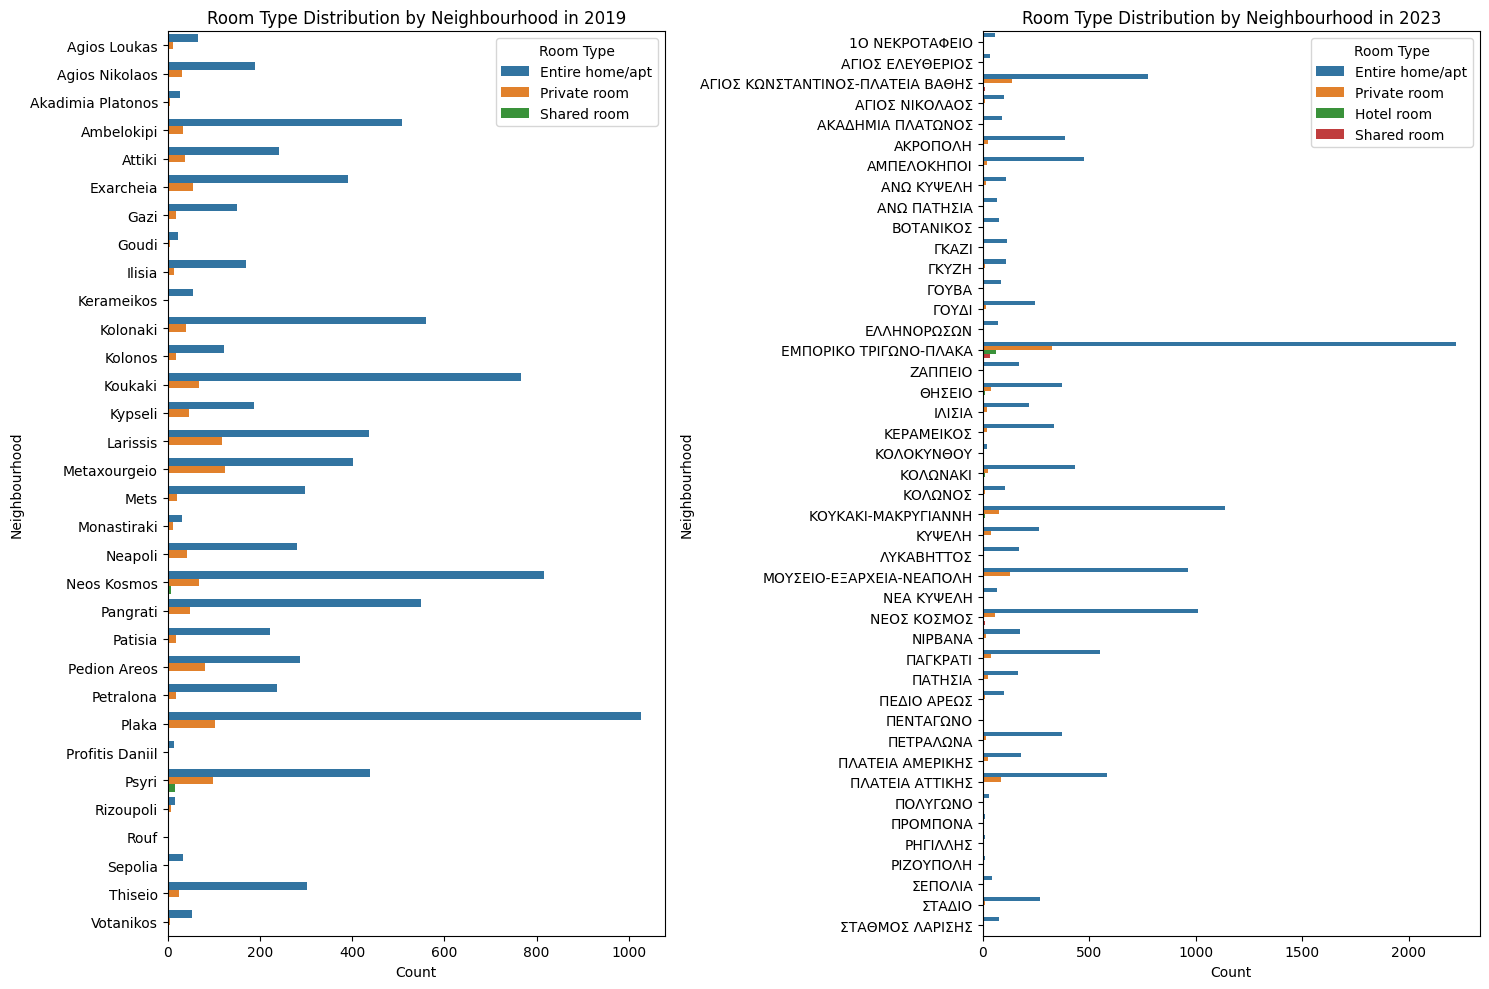

In [ ]:
# creating new dataframe for 2019, selecting only the needed columns
room_hoods1_2019 = df_train_2019[['id', 'neighbourhood', 'room_type']].copy()

# dropping any duplicates
room_hoods1_2019 = room_hoods1_2019.drop_duplicates(subset=['id'])
room_hoods_2019 = room_hoods1_2019[['neighbourhood', 'room_type']].copy()

# counting the occurrences of room types for each neighborhood for 2019
room_counts_2019 = room_hoods_2019.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

# doing the same for 2023
room_hoods1_2023 = df_train_2023[['id', 'neighbourhood_cleansed', 'room_type']].copy()
room_hoods1_2023 = room_hoods1_2023.drop_duplicates(subset=['id'])
room_hoods_2023 = room_hoods1_2023[['neighbourhood_cleansed', 'room_type']].copy()
room_counts_2023 = room_hoods_2023.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

# plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# plotting the data for 2019 using Seaborn
sns.barplot(data=room_counts_2019, y='neighbourhood', x='count', hue='room_type', ax=axes[0])
axes[0].set_ylabel('Neighbourhood')
axes[0].set_xlabel('Count')
axes[0].set_title('Room Type Distribution by Neighbourhood in 2019')
axes[0].legend(title='Room Type')

# plotting the data for 2023 using Seaborn
sns.barplot(data=room_counts_2023, y='neighbourhood_cleansed', x='count', hue='room_type', ax=axes[1])
axes[1].set_ylabel('Neighbourhood')
axes[1].set_xlabel('Count')
axes[1].set_title('Room Type Distribution by Neighbourhood in 2023')
axes[1].legend(title='Room Type')

# displaying both charts
plt.tight_layout()
plt.show()

# **Question 8:** Which is the most expensive room type?



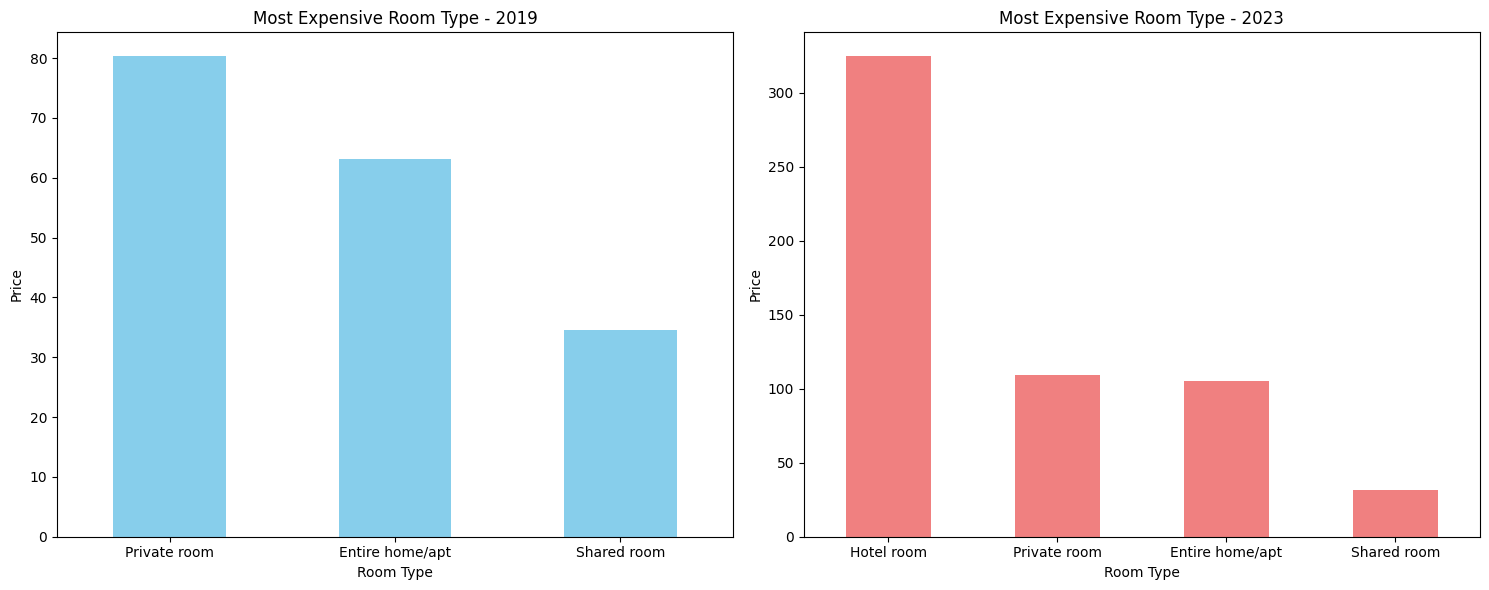

In [ ]:
# creating new copies of the dataframes
df_2019 = df_train_2019.copy()
df_2023 = df_train_2023.copy()

# removing dollar signs from the 'price' column and convert it to numeric
df_2019['price'] = df_2019['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_2023['price'] = df_2023['price'].str.replace('$', '').str.replace(',', '').astype(float)

# calculating the average price for each room type
average_price_2019 = df_2019.groupby('room_type')['price'].mean().sort_values(ascending=False)
average_price_2023 = df_2023.groupby('room_type')['price'].mean().sort_values(ascending=False)

# finding the most expensive room type for each year
most_expensive_room_2019 = average_price_2019.idxmax()
most_expensive_room_2023 = average_price_2023.idxmax()

# plotting the data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# first subplot: 2019
average_price_2019.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Most Expensive Room Type - 2019')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=0)

# second subplot: 2023
average_price_2023.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Most Expensive Room Type - 2023')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=0)

# preventing overlap
plt.tight_layout()
# displaying both charts
plt.show()

# **Question 9:** Generating a Folium map to display property data with latitude and longitude columns for *February* in the year *2023*.

In [ ]:
# selecting specific columns for a selected month (February)
columns = ['month', 'id', 'latitude', 'longitude', 'name', 'room_type', 'price', 'accommodates']
selected_data = df_train_2023[columns]

# filtering out the data for months that aren't "febrouary"
selected_data = selected_data[(selected_data['month'] != 'march') & (selected_data['month'] != 'april')]

# randomly picking 1000 values from the dataset
locations = selected_data.sample(n=1000)
location_list = locations[['latitude', 'longitude', 'name', 'room_type', 'price', 'accommodates']].values.tolist()

# creating our folium map
for place in location_list:
  my_map = folium.Map(location=[place[0], place[1]], zoom_start=13)

# making the map look a bit better with html
for place in location_list:
    popup_text = """
    <div style="width: 250px; background-color: #f8f8f8; border-radius: 5px; padding: 10px;">
      <h4 style="margin-bottom: 8px; color: #333; font-family: 'Helvetica Neue', sans-serif;">{}</h4>
      <p style="margin-bottom: 6px; color: #666; font-family: 'Arial', sans-serif; font-size: 14px;">Room Type: {}</p>
      <p style="margin-bottom: 6px; color: #666; font-family: 'Arial', sans-serif; font-size: 14px;">Price: {}</p>
      <p style="color: #666; font-family: 'Arial', sans-serif; font-size: 14px;">Can accommodate  up to {} people.</p>
    </div>
    """.format(place[2], place[3], place[4], place[5])

    folium.Marker([place[0], place[1]], popup=popup_text, icon=folium.Icon(color='cadetblue')).add_to(my_map)

# displaying map
my_map

# **Question 10:** Make different wordclouds for the columns "neighborhood",  "transit" and "description" for 2019 and 2023.




-------- WordCloud for neighborhood ------------



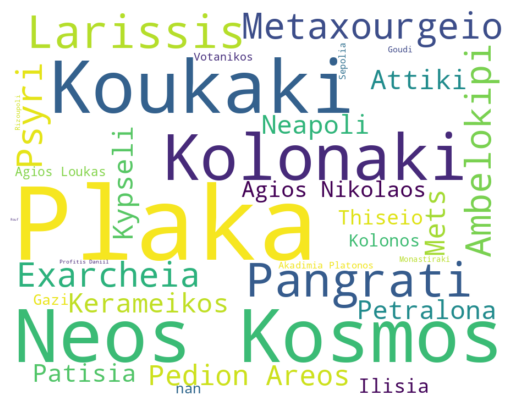



-------- WordCloud for transit ------------



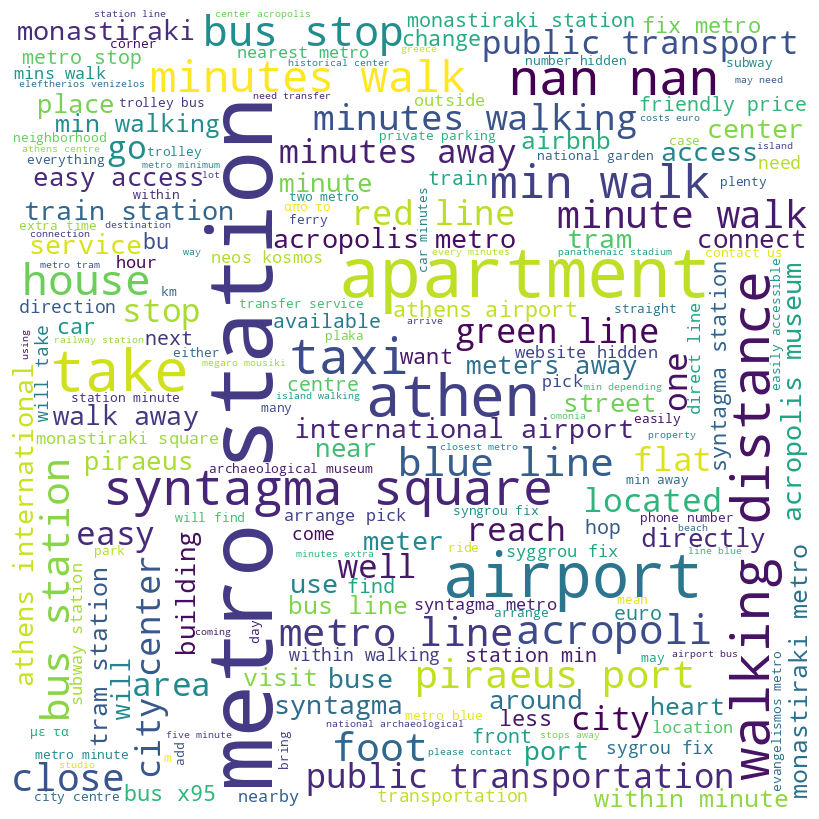



-------- WordCloud for description ------------



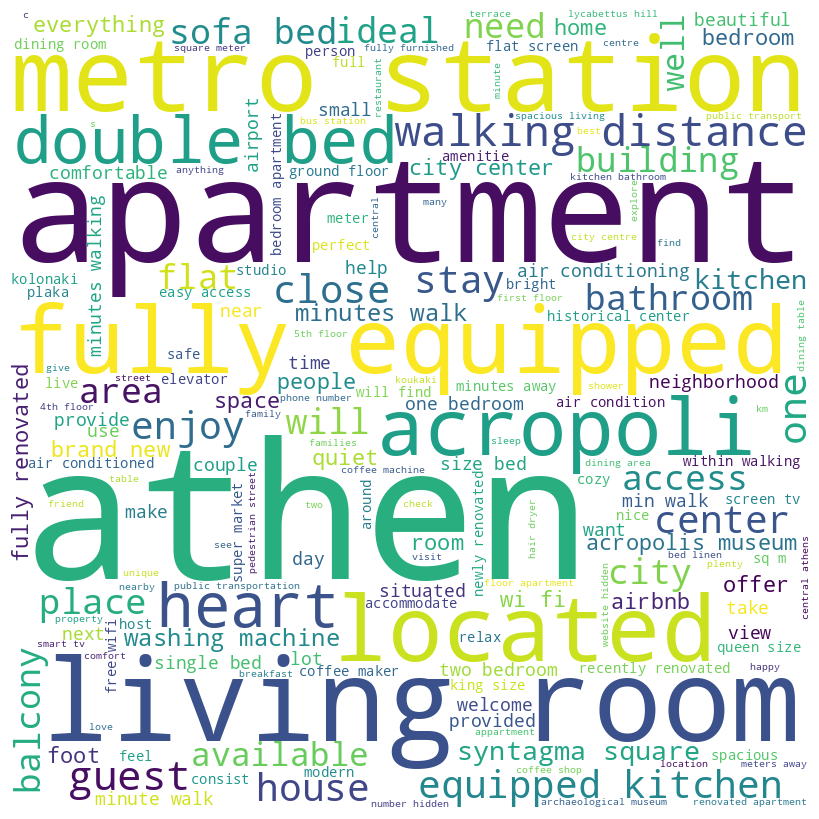

In [ ]:
# creating a "word frequency" dictionary for neighborhood
neighborhood_freq = {}
for nei in df_train_2019['neighbourhood']:
    nei = str(nei)
    if nei in neighborhood_freq:
        neighborhood_freq[nei] += 1
    else:
        neighborhood_freq[nei] = 1

# all frequencies are integers
neighborhood_freq = {k: int(v) for k, v in neighborhood_freq.items()}

# generating the word cloud for neighborhood
print("\n-------- WordCloud for neighborhood ------------\n")
wordcloud = WordCloud(width=900, height=700, background_color='white').generate_from_frequencies(neighborhood_freq)

# displaying the word cloud for neighborhood
plt.figure(figsize=(8, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# concatenating all transit descriptions into a single string
comments = ''
stopwords = set(STOPWORDS)

for tra in df_train_2019['transit']:
    # making each value to string
    tra = str(tra)

    # splitting the string into words
    words = tra.split()

    # changing each word into lowercase
    for i in range(len(words)):
        words[i] = words[i].lower()

    comments += " ".join(words) + " "

# generating the word cloud for transit
print("\n\n-------- WordCloud for transit ------------\n")
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comments)

# displaying the word cloud for transit
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# doing the same with transit
comments = ''
stopwords = set(STOPWORDS)

for desc in df_train_2019['description']:
    desc = str(desc)
    words = desc.split()
    for i in range(len(words)):
        words[i] = words[i].lower()
    comments += " ".join(words) + " "

# generating the word cloud for transit
print("\n\n-------- WordCloud for description ------------\n")
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comments)

# displaying the word cloud for description
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


-------- WordCloud for neighborhood ------------



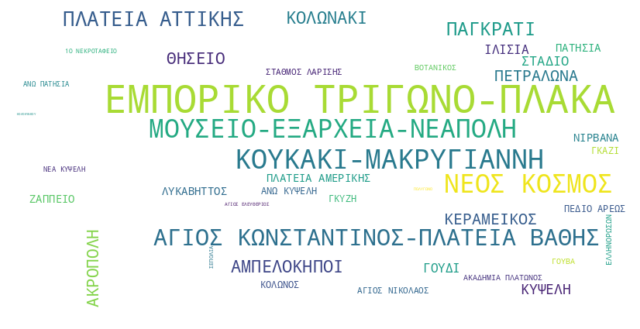



-------- WordCloud for description ------------



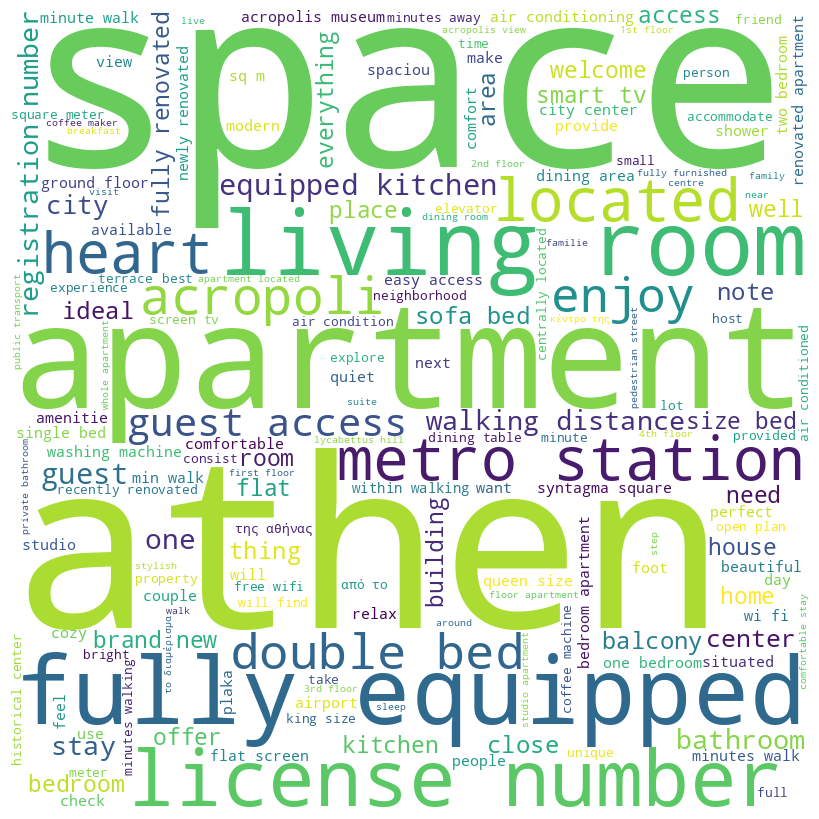

In [ ]:
# we'll follow with the same process we followed in 2019 for the year 2023.
# it's the same code (more or less)
neighborhood_freq = {}
for nei in df_train_2023['neighbourhood_cleansed']:
    if nei in neighborhood_freq:
        neighborhood_freq[nei] += 1
    else:
        neighborhood_freq[nei] = 1

print("\n-------- WordCloud for neighborhood ------------\n")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighborhood_freq)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

comments = ''
stopwords = set(STOPWORDS)
stopwords.update(['b', 'r', 'br', 'c', 's'])

for desc in df_train_2023['description']:
    desc = str(desc)
    words = desc.split()
    for i in range(len(words)):
        words[i] = words[i].lower()

    comments += " ".join(words) + " "

print("\n\n-------- WordCloud for description ------------\n")
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comments)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# **Question 11:** *This is not the question you are looking for!* 🤖

# Question 12: First calculate the average listing price per neighborhood. Then classify the neighborhoods into 3 groups depending on the average price of the rooms.


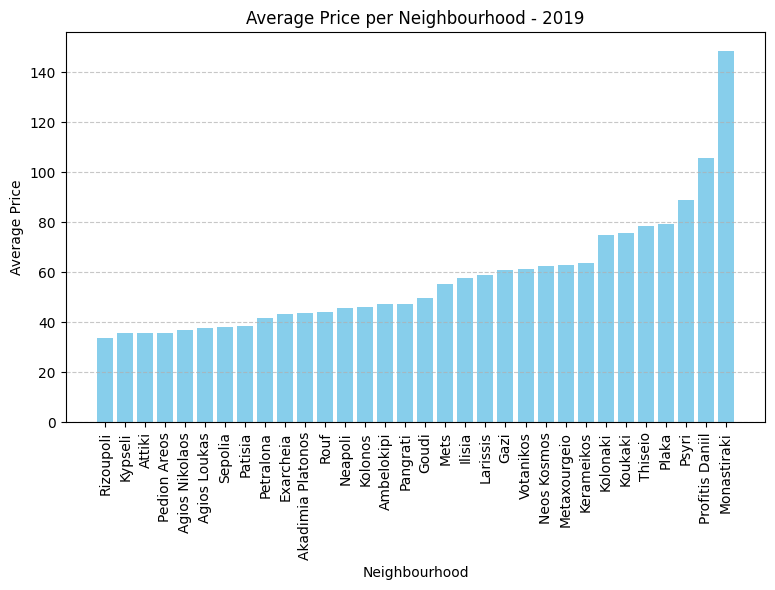


-----FOR 2019-----
Very Expensive Neighborhoods
  neighbourhood      price
        Thiseio  78.572327
          Plaka  79.232711
          Psyri  89.108932
Profitis Daniil 105.916667
    Monastiraki 148.625000

Moderate Neighborhoods
    neighbourhood     price
     Agios Loukas 37.811321
          Sepolia 37.972973
          Patisia 38.693023
        Petralona 41.831818
        Exarcheia 43.533186
Akadimia Platonos 43.600000
             Rouf 44.166667
          Neapoli 45.728571
          Kolonos 46.303922
       Ambelokipi 47.327935
         Pangrati 47.541109
            Goudi 49.827586
             Mets 55.293515
           Ilisia 57.647059
         Larissis 59.094595
             Gazi 61.128205
        Votanikos 61.381818
      Neos Kosmos 62.422695
     Metaxourgeio 62.902098
       Kerameikos 63.691630
         Kolonaki 75.048872
          Koukaki 75.728380

Cheap Neighborhoods
 neighbourhood     price
     Rizoupoli 33.750000
       Kypseli 35.803493
        Attiki 35.850202


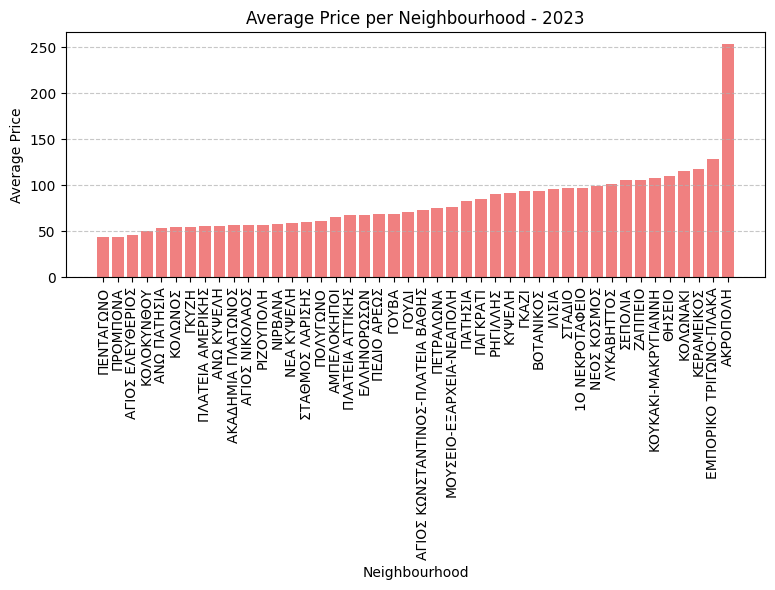



-----FOR 2023-----
Very Expensive Neighborhoods
neighbourhood_cleansed      price
               ΣΕΠΟΛΙΑ 105.703704
               ΖΑΠΠΕΙΟ 106.295597
   ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ 107.884718
                ΘΗΣΕΙΟ 109.626703
              ΚΟΛΩΝΑΚΙ 115.640227
            ΚΕΡΑΜΕΙΚΟΣ 117.854610
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ 128.119025
              ΑΚΡΟΠΟΛΗ 253.559078

Moderate Neighborhoods
          neighbourhood_cleansed      price
                        ΠΟΛΥΓΩΝΟ  61.300000
                     ΑΜΠΕΛΟΚΗΠΟΙ  65.891041
                 ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ  67.628458
                     ΕΛΛΗΝΟΡΩΣΩΝ  67.643564
                     ΠΕΔΙΟ ΑΡΕΩΣ  68.583333
                           ΓΟΥΒΑ  69.200000
                           ΓΟΥΔΙ  71.045643
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  72.744741
                       ΠΕΤΡΑΛΩΝΑ  75.669697
        ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ  76.120181
                         ΠΑΤΗΣΙΑ  82.525180
                        ΠΑΓΚΡΑΤΙ  84.921905
                        ΡΗΓΙΛΛΗΣ  90.750000
    

In [ ]:
# creating new copies of the dataframes
df_2019 = df_train_2019.copy()
df_2023 = df_train_2023.copy()

# keeping only listings that welcome up to a maximum of 2 people
df_2019 = df_2019[df_2019['beds'] == 2.0]
df_2023 = df_2023[df_2023['beds'] == 2.0]

# removing dollar signs from the 'price' column and convert it to numeric
df_2019['price'] = df_2019['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_2023['price'] = df_2023['price'].str.replace('$', '').str.replace(',', '').astype(float)

# calculating average price per neighborhood
avg_price_per_neighborhood_2019 = df_2019.groupby('neighbourhood')['price'].mean().reset_index()
avg_price_per_neighborhood_2023 = df_2023.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# sorting neighborhoods by average price
avg_price_per_neighborhood_2019 = avg_price_per_neighborhood_2019.sort_values(by='price')
avg_price_per_neighborhood_2023 = avg_price_per_neighborhood_2023.sort_values(by='price')

# displaying the data for 2019
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(avg_price_per_neighborhood_2019['neighbourhood'], avg_price_per_neighborhood_2019['price'], color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price per Neighbourhood - 2019')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# classifying neighborhoods into 3 groups for 2019
avg_price_2019 = avg_price_per_neighborhood_2019['price'].mean()
very_expensive_2019 = avg_price_per_neighborhood_2019[avg_price_per_neighborhood_2019['price'] > avg_price_2019 + 20]
cheap_2019 = avg_price_per_neighborhood_2019[avg_price_per_neighborhood_2019['price'] < avg_price_2019 - 20]
moderate_2019 = avg_price_per_neighborhood_2019[(avg_price_2019 - 20 <= avg_price_per_neighborhood_2019['price']) & (avg_price_per_neighborhood_2019['price'] <= avg_price_2019 + 20)]

print("\n-----FOR 2019-----")
print("============================")
print("Very Expensive Neighborhoods")
print("============================")
print(very_expensive_2019.to_string(index=False))
print("\n============================")
print("Moderate Neighborhoods")
print("============================")
print(moderate_2019.to_string(index=False))
print("\n============================")
print("Cheap Neighborhoods")
print("============================")
print(cheap_2019.to_string(index=False))
print("\n")

# displaying the data for 2023
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.bar(avg_price_per_neighborhood_2023['neighbourhood_cleansed'], avg_price_per_neighborhood_2023['price'], color='lightcoral')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price per Neighbourhood - 2023')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# classifying neighborhoods into 3 groups for 2019
avg_price_2023 = avg_price_per_neighborhood_2023['price'].mean()
very_expensive_2023 = avg_price_per_neighborhood_2023[avg_price_per_neighborhood_2023['price'] > avg_price_2023 + 20]
cheap_2023 = avg_price_per_neighborhood_2023[avg_price_per_neighborhood_2023['price'] < avg_price_2023 - 20]
moderate_2023 = avg_price_per_neighborhood_2023[(avg_price_2023 - 20 <= avg_price_per_neighborhood_2023['price']) & (avg_price_per_neighborhood_2023['price'] <= avg_price_2023 + 20)]

print("\n\n-----FOR 2023-----")
print("============================")
print("Very Expensive Neighborhoods")
print("============================")
print(very_expensive_2023.to_string(index=False))
print("\n============================")
print("Moderate Neighborhoods")
print("============================")
print(moderate_2023.to_string(index=False))
print("\n============================")
print("Cheap Neighborhoods")
print("============================")
print(cheap_2023.to_string(index=False))

# Question 13: What other information could you extract from the data you are given? Think of 3 additional questions for the area of Athens area and display the results.

Top 5 Neighbourhoods with Instant Bookable and Available 365 Days Listings

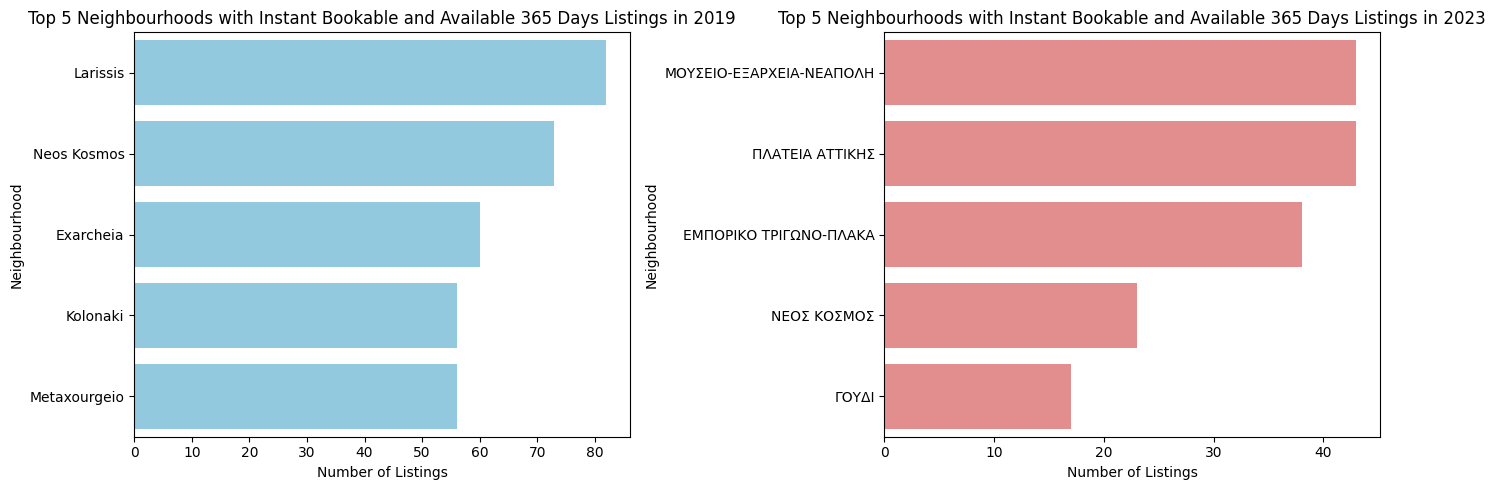

In [ ]:
# creating new dataframe for 2019, selecting only the needed columns
neighbourhood_revs_2019 = df_train_2019[['neighbourhood', 'instant_bookable', 'availability_365']]

# choosing listings that are both instant bookable and available 365 days a year at the same time
instant_available_365_2019 = neighbourhood_revs_2019[(neighbourhood_revs_2019['instant_bookable'] == 't') & (neighbourhood_revs_2019['availability_365'] == 365)]

# grouping by neighbourhood and counting the listings
neighborhood_ib_availability_2019 = instant_available_365_2019.groupby('neighbourhood').size().reset_index(name='count')

# keeping only the top 5 neighbourhoods with the most instant bookable and available 365 days listings and sorting in descending order
top_neighbourhoods_ib_availability_2019 = neighborhood_ib_availability_2019.nlargest(5, 'count').sort_values(by='count', ascending=False)

# doing the exact same for 2023
neighbourhood_revs_2023 = df_train_2023[['neighbourhood_cleansed', 'instant_bookable', 'availability_365']]
instant_available_365_2023 = neighbourhood_revs_2023[(neighbourhood_revs_2023['instant_bookable'] == 't') & (neighbourhood_revs_2023['availability_365'] == 365)]
neighborhood_ib_availability_2023 = instant_available_365_2023.groupby('neighbourhood_cleansed').size().reset_index(name='count')
top_neighbourhoods_ib_availability_2023 = neighborhood_ib_availability_2023.nlargest(5, 'count').sort_values(by='count', ascending=False)

# plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plotting the data for 2019 using Seaborn
sns.barplot(data=top_neighbourhoods_ib_availability_2019, x='count', y='neighbourhood', color='skyblue', ax=axes[0])
axes[0].set_title('Top 5 Neighbourhoods with Instant Bookable and Available 365 Days Listings in 2019')
axes[0].set_xlabel('Number of Listings')
axes[0].set_ylabel('Neighbourhood')

# plotting the data for 2023 using Seaborn
sns.barplot(data=top_neighbourhoods_ib_availability_2023, x='count', y='neighbourhood_cleansed', color='lightcoral', ax=axes[1])
axes[1].set_title('Top 5 Neighbourhoods with Instant Bookable and Available 365 Days Listings in 2023')
axes[1].set_xlabel('Number of Listings')
axes[1].set_ylabel('Neighbourhood')

# displaying both charts
plt.tight_layout()
plt.show()

Top 5 hosts who have been using Airbnb the longest

In [ ]:
# creating new copies of the dataframes
been_host_date_2019 = df_train_2019.copy()
been_host_date_2023 = df_train_2023.copy()

# changing 'host_since' column to "datetime" for 2019 and 2023
been_host_date_2019['host_since'] = pd.to_datetime(df_train_2019['host_since'])
been_host_date_2023['host_since'] = pd.to_datetime(df_train_2023['host_since'])

# getting the top 5 hosts who have been using Airbnb the longest
top_5_oldest_hosts_2019 = been_host_date_2019[['host_id', 'host_since']].drop_duplicates().sort_values(by='host_since').head(5)
top_5_oldest_hosts_2023 = been_host_date_2023[['host_id', 'host_since']].drop_duplicates().sort_values(by='host_since').head(5)

# printing the results
print("Top 5 hosts who have been using Airbnb the longest (data from 2019):")
print(top_5_oldest_hosts_2019.to_string(index=False))

print("\nTop 5 hosts who have been using Airbnb the longest (data from 2023):")
print(top_5_oldest_hosts_2023.to_string(index=False))

Top 5 hosts who have been using Airbnb the longest (data from 2019):
 host_id host_since
   37177 2009-09-08
   43566 2009-10-05
   58146 2009-11-28
   70840 2010-01-15
  109363 2010-04-16

Top 5 hosts who have been using Airbnb the longest (data from 2023):
 host_id host_since
    1805 2008-08-12
   37177 2009-09-08
   70840 2010-01-15
  102433 2010-04-02
  109363 2010-04-16


Top 5 listings with the most bedrooms in 2019 and 2023



In [ ]:
# creating new copies of the dataframes
top_5_listings_2019 = df_train_2019.copy()
top_5_listings_2023 = df_train_2023.copy()

# getting the top 5 listings with the most bedrooms
top_5_listings_2019 = top_5_listings_2019.nlargest(5, 'bedrooms', keep='all').drop_duplicates(subset=['id'])[['id', 'bedrooms']]
top_5_listings_2023 = top_5_listings_2023.nlargest(5, 'bedrooms', keep='all').drop_duplicates(subset=['id'])[['id', 'bedrooms']]

# printing the results
print("Top 5 listings with the most bedrooms in 2019:")
print(top_5_listings_2019.to_string(index=False))

print("\nTop 5 listings with the most bedrooms in 2023:")
print(top_5_listings_2023.to_string(index=False))


Top 5 listings with the most bedrooms in 2019:
      id  bedrooms
30079779      14.0
 5722969      10.0
27304758      10.0
30123469      10.0
32649686      10.0

Top 5 listings with the most bedrooms in 2023:
                id  bedrooms
          42535626      33.0
          50060215      14.0
805630796413232909      12.0
806190418662076218      12.0
863076519278340644      12.0


# Question 14: Recent laws regarding Airbnbs.

In [ ]:
# creating new copies of the dataframes
df_2019 = df_train_2019.copy()
df_2023 = df_train_2023.copy()

# calculating the number of unique listings for each host
host_listings = df_2019.groupby('host_id')['id'].nunique().reset_index(name='num_host_listings')

# sorting the hosts by the number of listings in descending order
sorted_hosts = host_listings.sort_values(by='num_host_listings', ascending=False)

# selecting the top 10 hosts
top_10_hosts = sorted_hosts.head(10)

print("Top 10 hosts with the most properties in 2019:")
print(top_10_hosts)

# plot
#top_10_hosts.plot(kind='bar', x='host_id', y='num_host_listings', color='skyblue')
#plt.xlabel('Host ID')
#plt.ylabel('Number of Listings')
#plt.title('Top 10 Hosts with the Most Properties')
#plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

# doing the exact same thing for 2023
host_listings = df_2023.groupby('host_id')['id'].nunique().reset_index(name='num_host_listings')
sorted_hosts = host_listings.sort_values(by='num_host_listings', ascending=False)
top_10_hosts = sorted_hosts.head(10)

print("\n\nTop 10 hosts with the most properties in 2023:")
print(top_10_hosts)

# plot
#top_10_hosts.plot(kind='bar', x='host_id', y='num_host_listings', color='skyblue')
#plt.xlabel('Host ID')
#plt.ylabel('Number of Listings')
#plt.title('Top 10 Hosts with the Most Properties')
#plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

Top 10 hosts with the most properties in 2019:
        host_id  num_host_listings
2577   77457889                126
1303   29927830                 96
3626  135482892                 86
75       748818                 80
144     1621474                 72
127     1418201                 63
3185  112527018                 57
2286   65714690                 48
203     2718115                 46
3867  149346682                 45


Top 10 hosts with the most properties in 2023:
        host_id  num_host_listings
665    20104194                116
908    29927830                115
2240  113548208                 90
1954   90390850                 89
62       748818                 76
3105  182156346                 68
133     2089542                 62
1242   47267002                 61
2238  113353393                 60
2338  123074489                 58


# Question 15: Comparison of Airbnb Data between 2019 and 2023

Now that we've wrapped up those earlier questions, let's jump into comparing the data from 2019 and 2023 to see if we can spot any interesting changes or trends.

- About the room types, in both years, the Entire Home was the most common type. However, in 2023, a new room type was introduced on the platform - the hotel room.
- There was a significant increase in the average listing price from 2019 to 2023, nearly doubling in price.
- The top three neighborhoods on the platform remain the same, but there is a slight change from the fourth place onward.
- There has been an increase in the number of listings, almost doubling the previous amount (way more entire houses and shared rooms). Plaka remains the top neighborhood for every month in both years!
- In 2019, the most expensive room type on the platform was the private room. However, in 2023, the hotel rooms became the most expensive, by a significant amount as well.
- Neighborhoods that were once very expensive to live in are now considered to be only moderately priced. In 2023, a very expensive neighborhood has nearly doubled its average price compared to what the neighborhood had in 2019.
- Finally, despite the law, the most hosts on the platform persist in maintaining an excessive number of listings under their name, exceeding the mere 3 that the law suggests.


# **Second Part: ✨Recommendation System✨**

# **The 2023 Description WordCloud:** A few things have changed on this wordcloud!




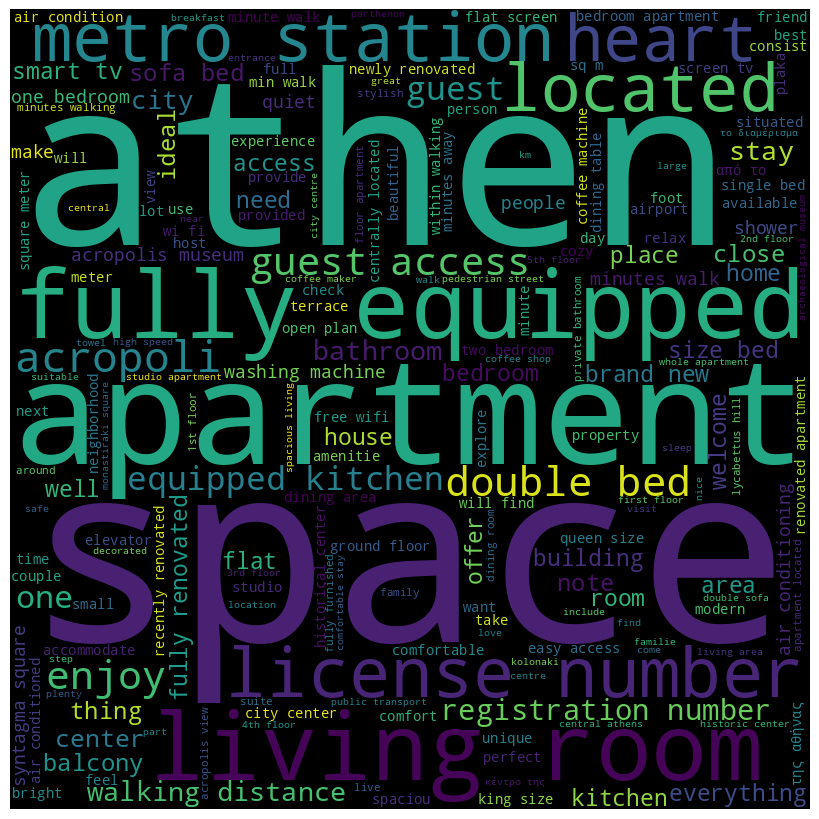

In [ ]:
comments = ''
stopwords = set(STOPWORDS)
stopwords.update(['b', 'r', 'br', 'c', 's'])

for desc in df_train_2023['description']:
    desc = str(desc)
    words = desc.split()
    for i in range(len(words)):
        words[i] = words[i].lower()
    comments += " ".join(words) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      colormap='viridis',
                      min_font_size=10).generate(comments)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# Creating the new column for our dataframe.

In [ ]:
# creating new dataframe for 2023, selecting only the needed columns
rec_sys_2023 = df_train_2023[['id', 'name', 'description']].copy()

# concatenating 'name' and 'description' columns into a new column called 'name_and_desc'
rec_sys_2023['name_and_desc'] = rec_sys_2023['name'].str.cat(rec_sys_2023['description'], sep=' ').fillna('NULL')

# selecting final columns for 2019
rec_sys_2023 = rec_sys_2023[['id','name_and_desc', 'name', 'description']].copy()
rec_sys_2023 = rec_sys_2023.drop_duplicates(subset=['id'])

# **Question 1:** The TF-IDF table

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2)) # common English words should be ignored, unigrams and bigrams being used
collection = rec_sys_2023['name_and_desc'].values.astype('U')

terms = tfidf.fit_transform(collection)

# **Question 2:** Cosine Similarity for the TF-IDF table

In [ ]:
cos_sim = cosine_similarity(terms, terms)

# creating a dictionary to store the 100 most similar objects
similar_objects = {}

# loop through each row in the cosine similarity table
for i, row in enumerate(cos_sim):
    # enumerating through each similarity and storing the index and values
    sim_scores = [(j, score) for j, score in enumerate(row) if j != i]
    # sorting the similarities in descending order
    sim_scores.sort(key=lambda x: x[1], reverse=True)
    # storing the top 100 most similar objects
    similar_objects[i] = sim_scores[:100]

# example
print("Most similar Listings for Listing 0:")
for obj_index, sim_score in similar_objects[0]:
    print(f"Listing {obj_index}: \t Similarity Score = {sim_score:.4f}")

Most similar Listings for Listing 0:
Listing 5763: 	 Similarity Score = 0.1971
Listing 11733: 	 Similarity Score = 0.1872
Listing 2091: 	 Similarity Score = 0.1817
Listing 13462: 	 Similarity Score = 0.1770
Listing 99: 	 Similarity Score = 0.1722
Listing 3054: 	 Similarity Score = 0.1702
Listing 1757: 	 Similarity Score = 0.1700
Listing 3873: 	 Similarity Score = 0.1638
Listing 3867: 	 Similarity Score = 0.1618
Listing 3875: 	 Similarity Score = 0.1616
Listing 11664: 	 Similarity Score = 0.1608
Listing 1541: 	 Similarity Score = 0.1563
Listing 6183: 	 Similarity Score = 0.1519
Listing 2494: 	 Similarity Score = 0.1481
Listing 3140: 	 Similarity Score = 0.1462
Listing 825: 	 Similarity Score = 0.1446
Listing 13373: 	 Similarity Score = 0.1421
Listing 4086: 	 Similarity Score = 0.1405
Listing 12158: 	 Similarity Score = 0.1396
Listing 2401: 	 Similarity Score = 0.1387
Listing 4196: 	 Similarity Score = 0.1378
Listing 7423: 	 Similarity Score = 0.1374
Listing 10156: 	 Similarity Score = 0

# **Question 3:** Finaly, the actual Recommendation System!

In [ ]:
# making a list of only the listing ids from 2023
id_list = rec_sys_2023['id'].tolist()

def recommend(item_id, num):
    # checking if the item_id is in our list of ids
    if item_id not in id_list:
        print("ERROR! Couldn't find an ID like that in our list.")
        return

    # getting info of the item_id
    data = rec_sys_2023[rec_sys_2023['id'] == item_id]
    print("Recommending", num, "similar listings to", data['name'].iloc[0])
    print("----------------------------------------------\n")

    # finding the index of item_id in the id list
    data_row = id_list.index(item_id)
    # sorting similarities and getting the top listings
    similarities = cos_sim[data_row]
    sorted_indices = np.argpartition(-similarities, num)[:num+1]
    top_similar_items = sorted_indices[:num+1]

    # looping through the top similar listings
    for rec in top_similar_items:
        if id_list[rec] != item_id:
            print("Recommended:", rec_sys_2023.loc[rec_sys_2023['id'] == id_list[rec], 'name'].iloc[0])
            print("Description:", rec_sys_2023.loc[rec_sys_2023['id'] == id_list[rec], 'description'].iloc[0])
            print("score:", cos_sim[data_row][rec], "\n")

# trying out the function
recommend(10595, 5)

Recommending 5 similar listings to 3 bedrooms, 2 bathrooms, 2nd floor with elevator
----------------------------------------------

Recommended: Rental unit in Athina · 2 bedrooms · 2 beds · 1 bath
Description: Welcome to Gazi, the heart of entertainment of Athens. A stylish  apartment of 90 sq. meters apartment, only 4 min walking to Kerameikos Metro stop. Enjoy a peaceful apt and walk  within 10-15 minutes to archaeological sites of Thisio , Acropolis or enjoy nightlife of Gazi, Plaka, Psyrri.<br />There is elevator<br />1  bedroom with double bed and air condition<br />1 bedroom with 1 bed<br />1 living room air condition<br />1 kitchen<br />1 bathroom<br />1 Washing machine room (detergent is not provided)<br />1 Balcony<br /><br /><b>The space</b><br />Experience at the same time Gazi's famous nightlife and walking proximity to all Ancient sites, whether you are in Athens for business or leisure, or both.<br /><br />It is located in a residential area where you can experience life

# **Question 4:** *What question 4?*

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import string

# downloading tools for NLP processing
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# setting up what we need out of our text
stop_words = set(stopwords.words('english'))
stop_words.update(['b', 'r', 'br', 'c', 's', '/b', '·'])
punctuation = set(string.punctuation)

# cleaning up the text, using punkt
def preprocess_text(token_list):
    return [word.lower() for word in token_list if word.lower() not in stop_words and word.lower() not in punctuation]

rec_sys_2023['name_and_desc'] = rec_sys_2023['name_and_desc'].apply(preprocess_text)

# concatenating all words from our dataframe into a list
all_data_23 = [token for data in rec_sys_2023['name_and_desc'] for token in data]

# finding some bigrams
bigram_measures_23 = BigramAssocMeasures()
finder_23 = BigramCollocationFinder.from_words(all_data_23)

# filtering out any bigrams that don't appear at least twice
finder_23.apply_freq_filter(2)

# finding the top 10 bigrams
top_10_bigrams_23 = finder_23.nbest(bigram_measures_23.raw_freq, 10)

# displaying the results
print("Top 10 bigrams:")
for bigram in top_10_bigrams_23:
    print(bigram)

Top 10 bigrams:
('license', 'number')
('fully', 'equipped')
('living', 'room')
('metro', 'station')
('guest', 'access')
('double', 'bed')
('equipped', 'kitchen')
('heart', 'athens')
('1', 'bedroom')
('1', 'bath')
